# Exercixe 2.3 - Random Forest for Dusseldorf (all years)

## Contents:

##### 1. Importing Libraries and Data
##### 2. Data Wrangling
##### 3. Reshaping for modeling
##### 4. Splitting Data
##### 5. Random Forest Model
##### 6. Feature Importances

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create Path

path = r'C:\Users\lisad\OneDrive\Homework\Machine Learning with Python\Achievement 2'

In [3]:
# Import cleaned weather data

X = pd.read_csv(os.path.join(path, 'Data Sets', 'unscaled_weather_cleaned_withdate.csv'), index_col = False)

In [4]:
# Check

X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [5]:
# Check shape

X.shape

(22950, 137)

In [6]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data Sets', 'Pleasant_Weather.csv'), index_col = False)

In [7]:
# Check

answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check shape

answers.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to Dusseldorf station only

In [9]:
# Create a list of the columns containing "Dusseldorf" in their names

dusseldorf_list = list(x for x in X.columns if x.find('DUSSELDORF') >=0)
dusseldorf_list

['DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max']

In [10]:
# Create a dataframe with those columns

df_dusseldorf = X[dusseldorf_list]
df_dusseldorf

,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5
1,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0
2,7,0.95,1.0161,0.12,0.07,0.0,7.1,6.9,9.1
3,8,0.86,1.0161,0.12,0.02,0.0,6.8,3.6,8.0
4,7,0.92,1.0161,0.12,0.62,0.0,7.7,6.2,11.0
...,...,...,...,...,...,...,...,...,...
22945,8,0.75,1.0214,1.13,0.20,6.4,17.8,13.6,21.4
22946,7,0.71,1.0186,1.13,0.20,4.9,19.4,15.4,23.9
22947,8,0.73,1.0196,1.13,0.20,4.0,18.2,13.4,22.0
22948,7,0.73,1.0176,1.13,0.20,6.9,16.7,11.9,21.1


In [11]:
# Reduce answers dataset to Dusseldorf's answers only

answers_dusseldorf = answers['DUSSELDORF_pleasant_weather']
answers_dusseldorf

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: DUSSELDORF_pleasant_weather, Length: 22950, dtype: int64

In [12]:
df_dusseldorf.shape # observations dataset has the correct shape

(22950, 9)

In [13]:
answers_dusseldorf.shape # predictions dataset has the correct shape

(22950,)

## 3. Reshaping for modeling

In [14]:
X2 = df_dusseldorf

In [15]:
y2 = answers_dusseldorf

In [16]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [17]:
X.shape

(22950, 9)

In [18]:
y.shape

(22950,)

## 4. Splitting data

In [19]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [21]:
X_train

array([[  3.    ,   0.63  ,   1.0153, ...,  18.8   ,   9.9   ,  24.    ],
       [  3.    ,   0.75  ,   1.0172, ...,  -3.6   ,  -6.3   ,  -1.2   ],
       [  4.    ,   0.91  ,   1.0108, ...,  -5.4   , -11.9   ,  -2.6   ],
       ...,
       [  8.    ,   0.84  ,   1.0098, ...,   8.6   ,   5.1   ,  10.2   ],
       [  7.    ,   0.77  ,   1.0161, ...,  11.6   ,   8.2   ,  15.3   ],
       [  2.    ,   0.64  ,   1.0243, ...,   7.6   ,   1.    ,  14.    ]],
      shape=(17212, 9))

In [22]:
y_train

array([1, 0, 0, ..., 0, 0, 0], shape=(17212,))

In [23]:
X_test

array([[ 3.    ,  0.74  ,  1.0161, ..., 12.6   ,  6.9   , 19.5   ],
       [ 7.    ,  0.56  ,  1.0102, ...,  2.2   ,  0.7   ,  5.4   ],
       [ 8.    ,  0.78  ,  1.0077, ..., 18.2   , 17.3   , 20.8   ],
       ...,
       [ 1.    ,  0.8   ,  1.0133, ..., 11.3   ,  4.    , 20.8   ],
       [ 7.    ,  0.77  ,  1.0259, ...,  7.4   ,  6.2   ,  9.1   ],
       [ 8.    ,  0.88  ,  1.0196, ..., 11.4   ,  7.4   , 14.3   ]],
      shape=(5738, 9))

In [24]:
y_test

array([0, 0, 0, ..., 1, 0, 0], shape=(5738,))

## 5. Random Forest Model

In [25]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9998257232485186


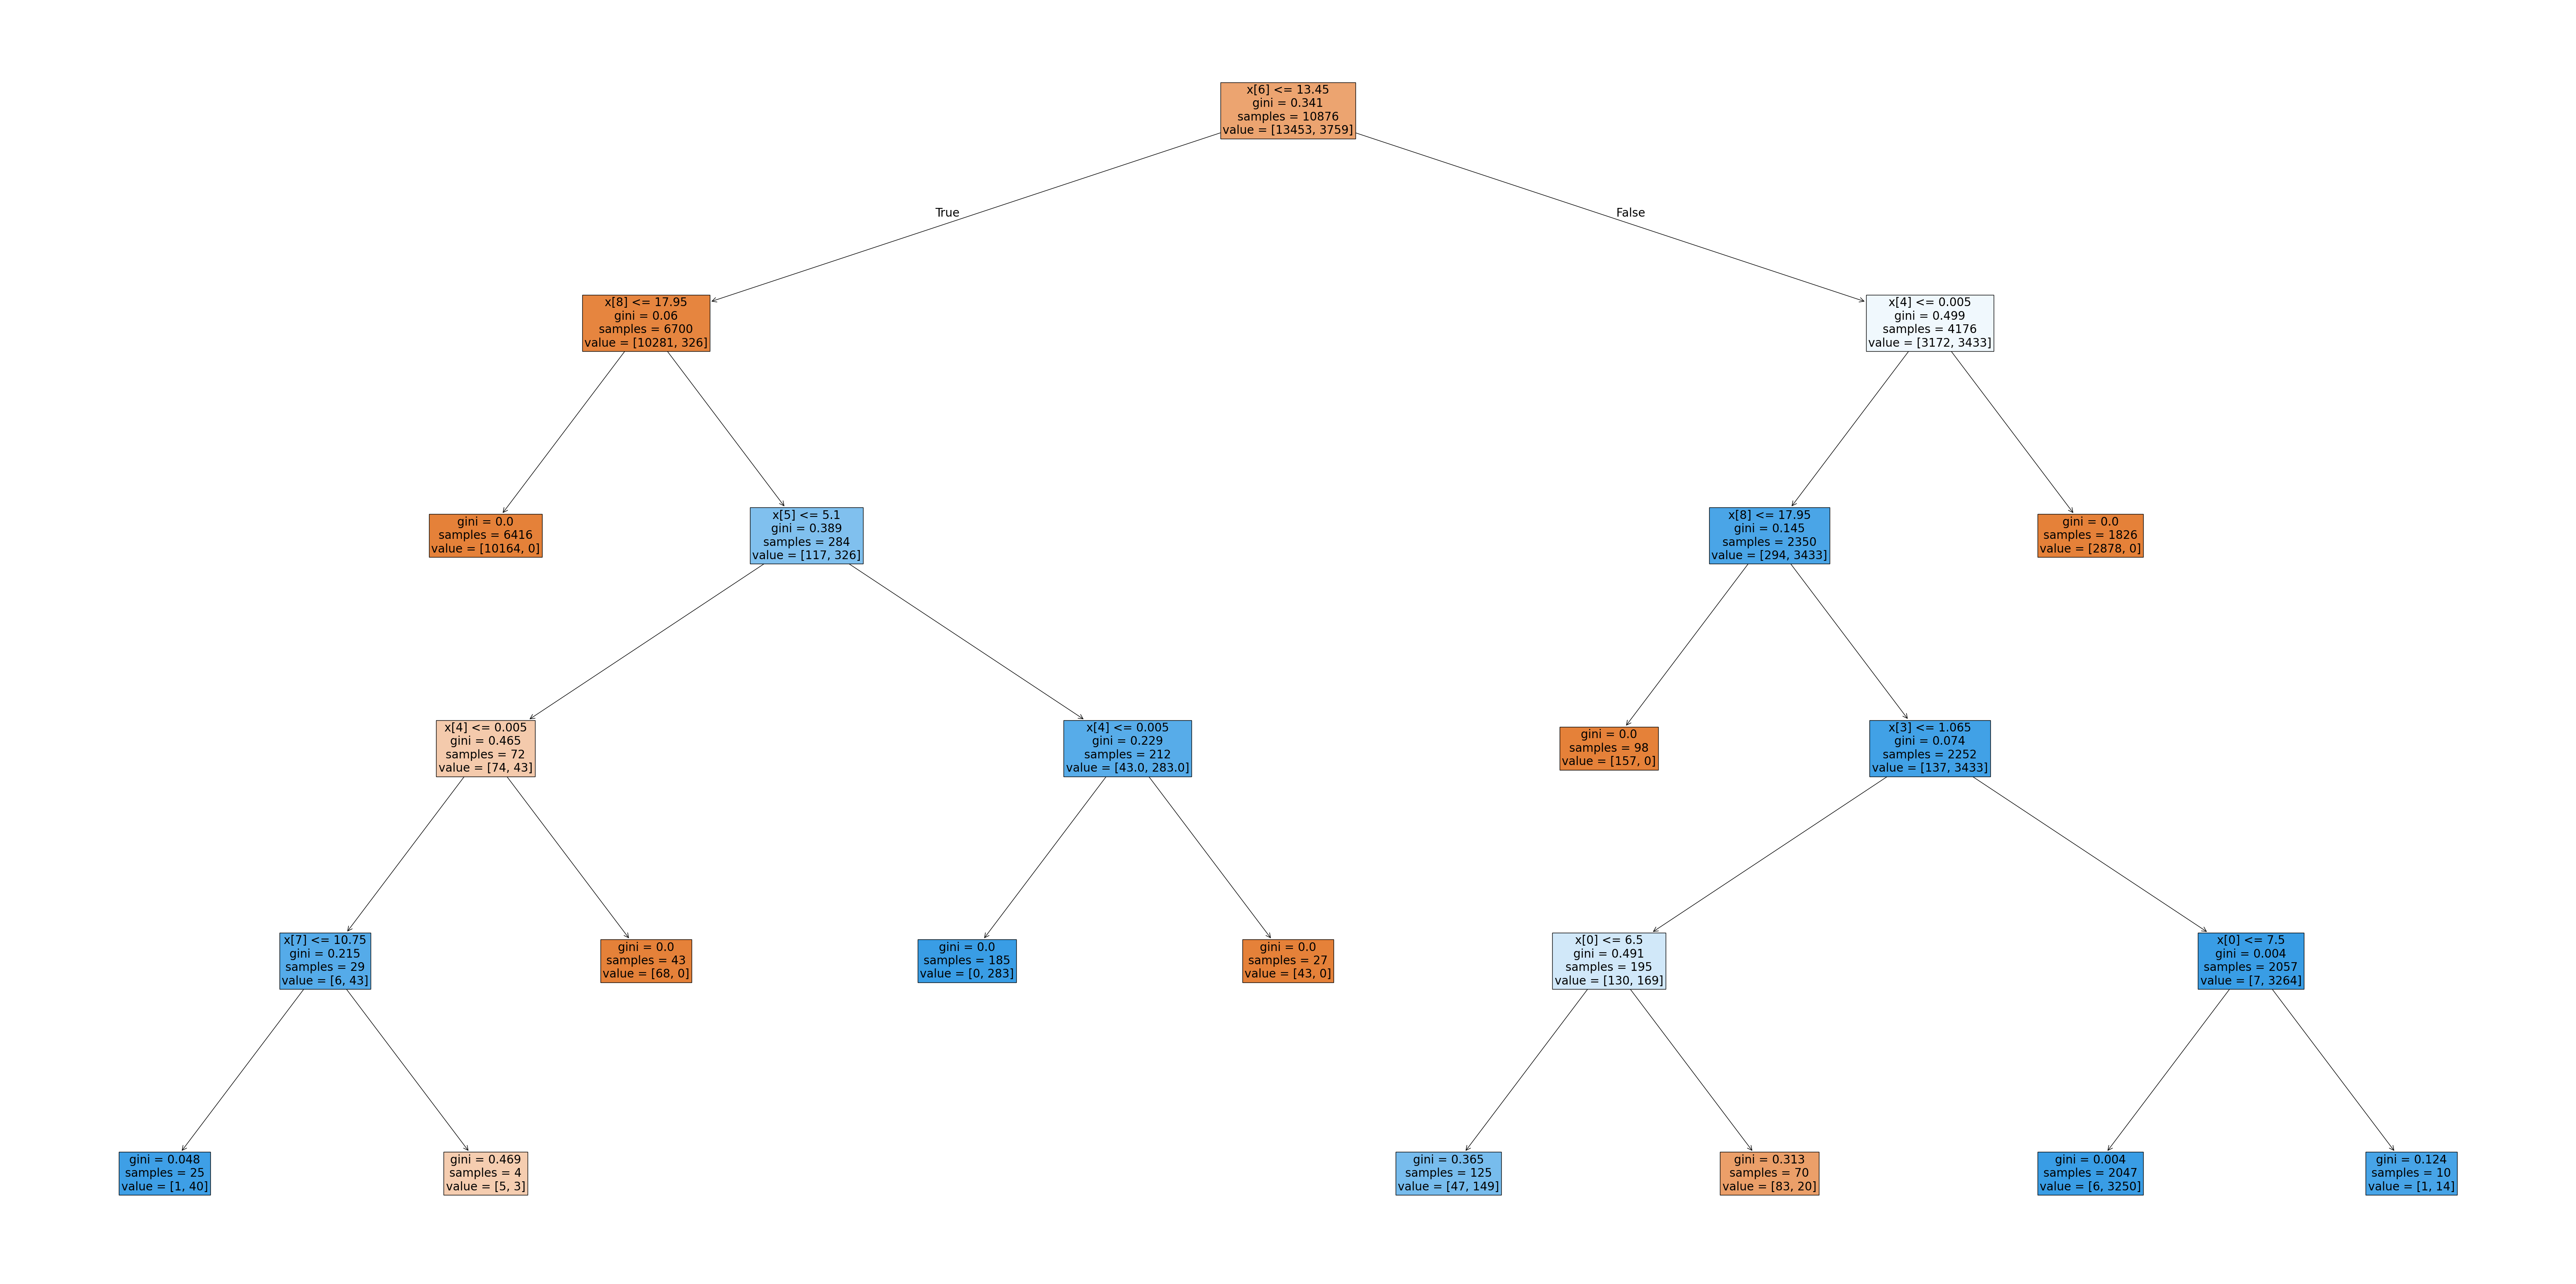

In [27]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [28]:
fig.savefig(os.path.join(path, 'Visualizations', 'rf_dusseldorf.png'),bbox_inches='tight')

## 6. Uncovering Feature Importances

In [29]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.0383754 , 0.02247372, 0.01161167, 0.1124117 , 0.31706592,
       0.06865745, 0.14306997, 0.02330399, 0.26303018])

In [30]:
# Create a list of weather features

wx_list = [feature.replace('DUSSELDORF_', '') for feature in dusseldorf_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [31]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.038375
humidity            0.022474
pressure            0.011612
global_radiation    0.112412
precipitation       0.317066
sunshine            0.068657
temp_mean           0.143070
temp_min            0.023304
temp_max            0.263030
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


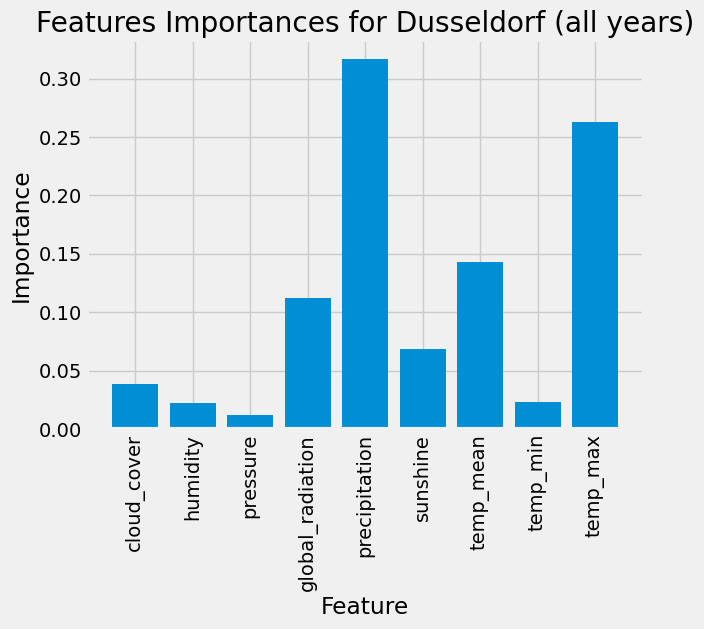

In [32]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Dusseldorf (all years)');

plt.savefig(os.path.join(path, 'Visualizations', 'dusseldorf_feature_importances.png'), bbox_inches='tight')
plt.show()